
Original dataset shape: (817, 24)
Dataset shape after outlier removal: (333, 24)


<Figure size 1200x800 with 0 Axes>

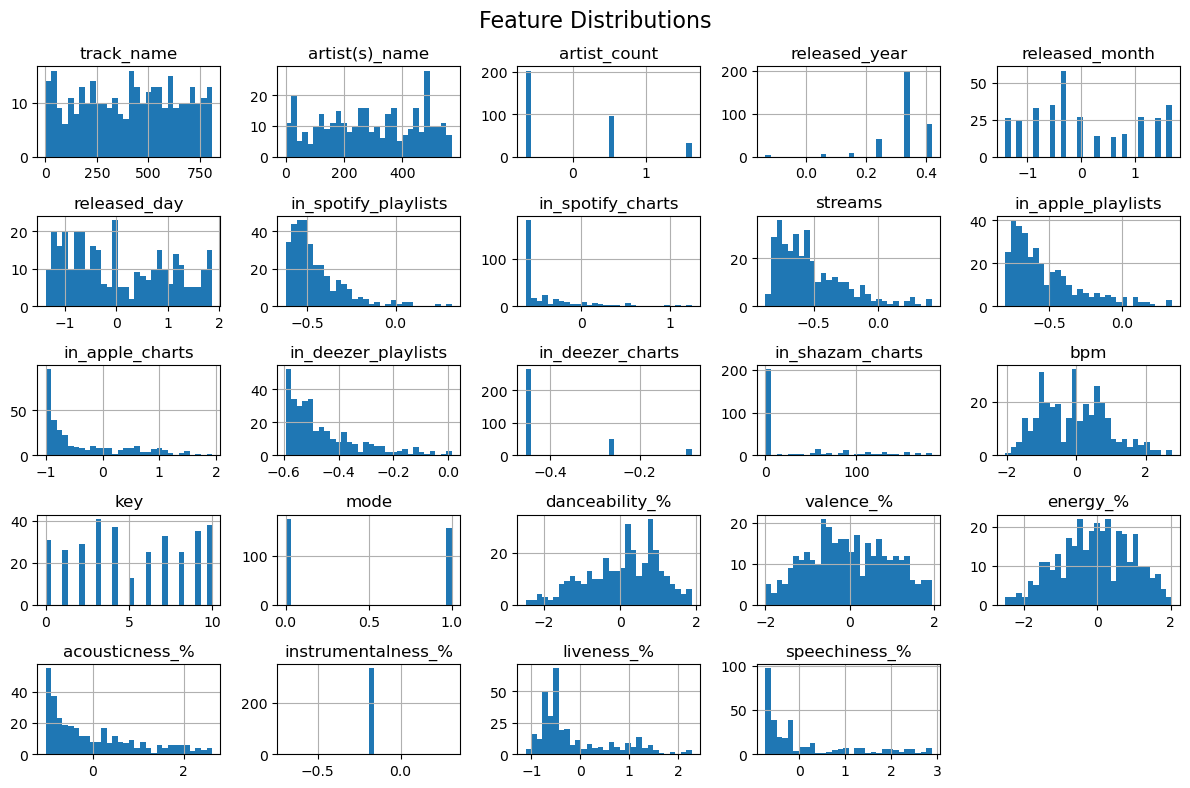

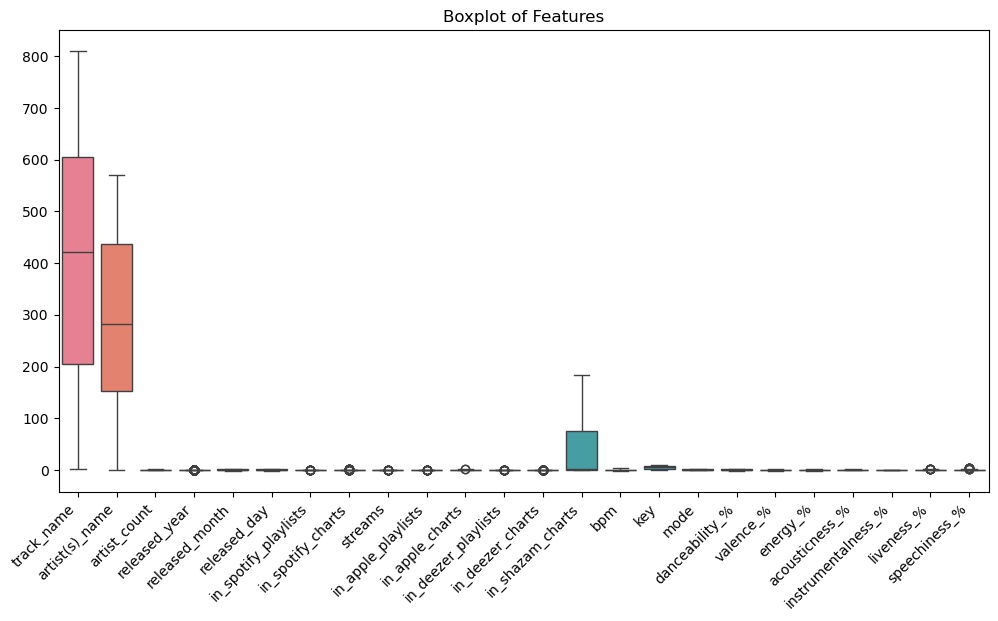

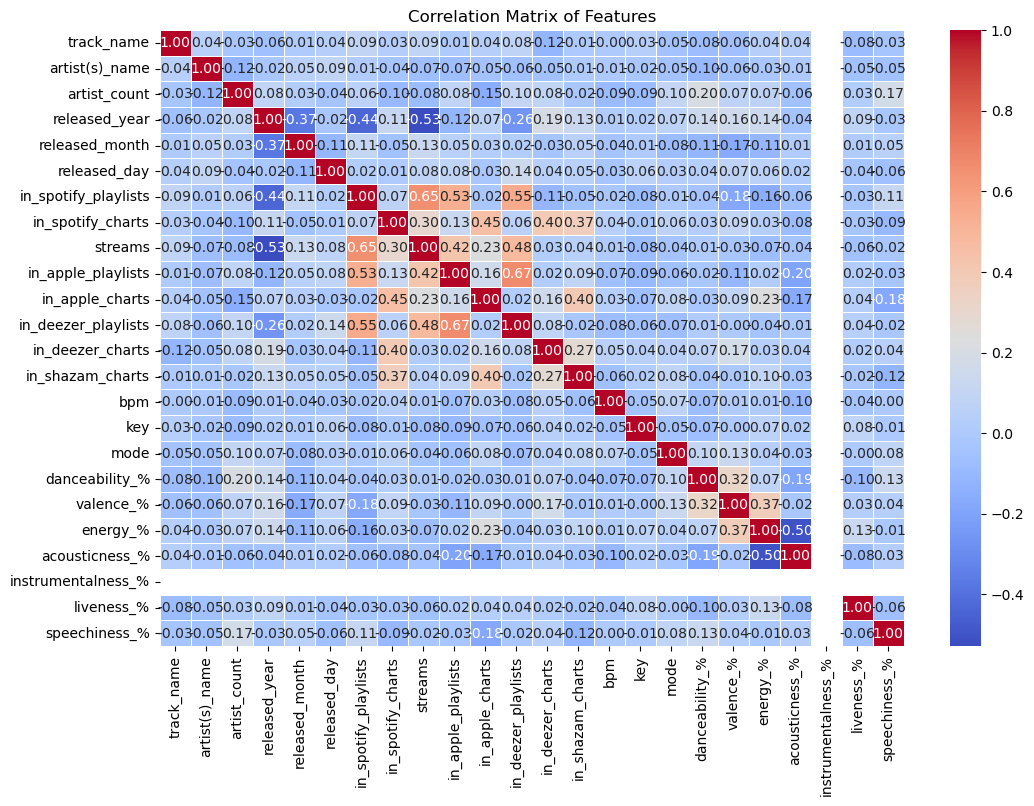

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("Spotify -Raw Data.csv", encoding='ISO-8859-1')

# missing_values = df.isnull().sum()
# print("\nMissing values per column:\n", missing_values)

# df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
# df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
# df.fillna({'streams': 0, 'in_deezer_playlists': df['in_deezer_playlists'].median()}, inplace=True)

# df_cleaned = df.dropna()

# print("\nMissing values after cleaning:\n", df_cleaned.isnull().sum())

# duplicates = df_cleaned.duplicated().sum()
# print("\nNumber of duplicate rows:", duplicates)
# df_cleaned = df_cleaned.drop_duplicates()

# print("\nDuplicates after cleaning:", df_cleaned.duplicated().sum())

# categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
# label_encoders = {}

# for col in categorical_cols:
#     label_encoders[col] = LabelEncoder()
#     df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

# print("\nCategorical columns after encoding:\n", df_cleaned.head())

# numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
# scaler = StandardScaler()
# df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# print("\nFirst few rows after scaling numerical features:\n", df_cleaned.head())

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

df_no_outliers = remove_outliers_iqr(df_cleaned, numerical_cols)

print(f"\nOriginal dataset shape: {df_cleaned.shape}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")

plt.figure(figsize=(12, 8))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix of Features")
plt.show()

<Figure size 1200x800 with 0 Axes>

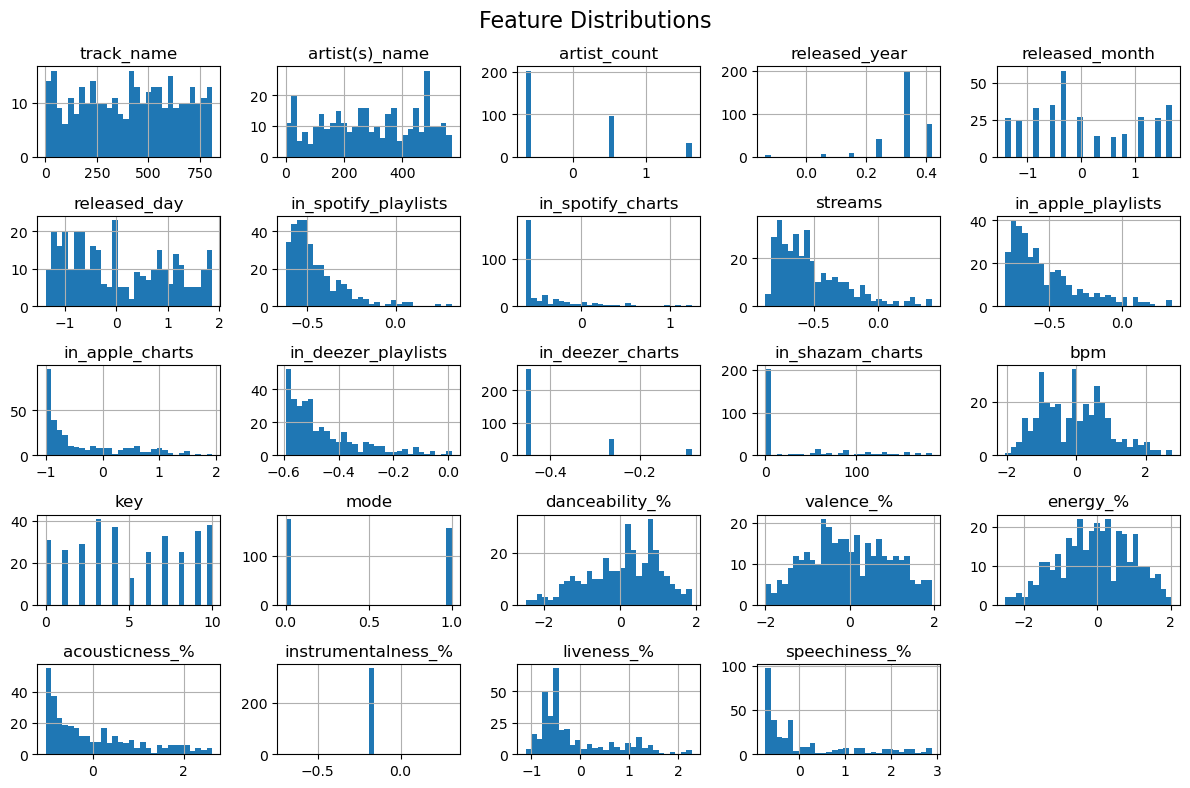

In [7]:
plt.figure(figsize=(12, 8))
df_no_outliers.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

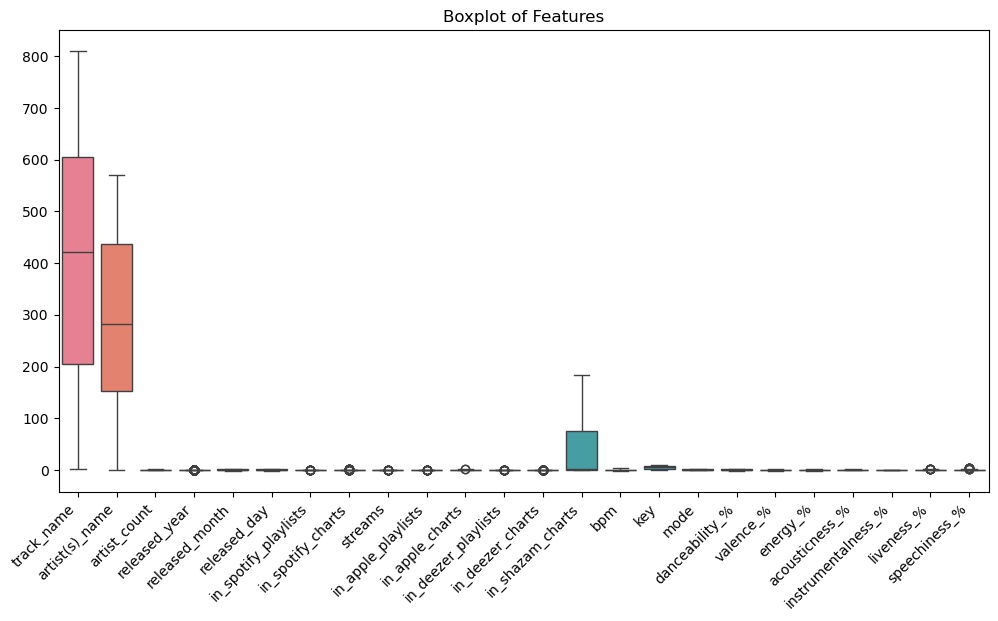

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=45, ha="right")
plt.title("Boxplot of Features")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

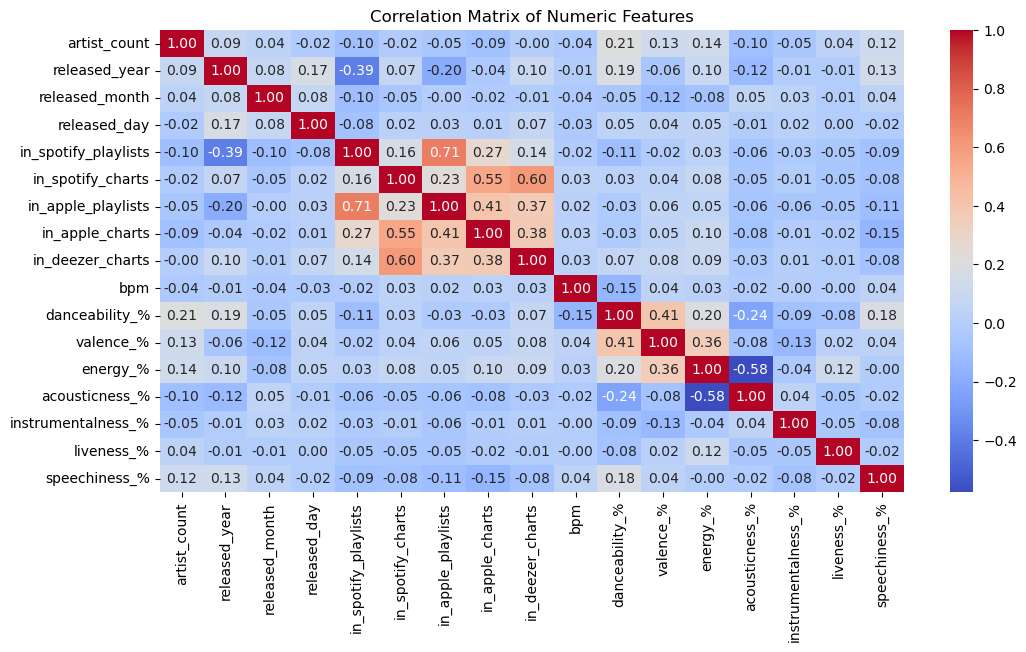

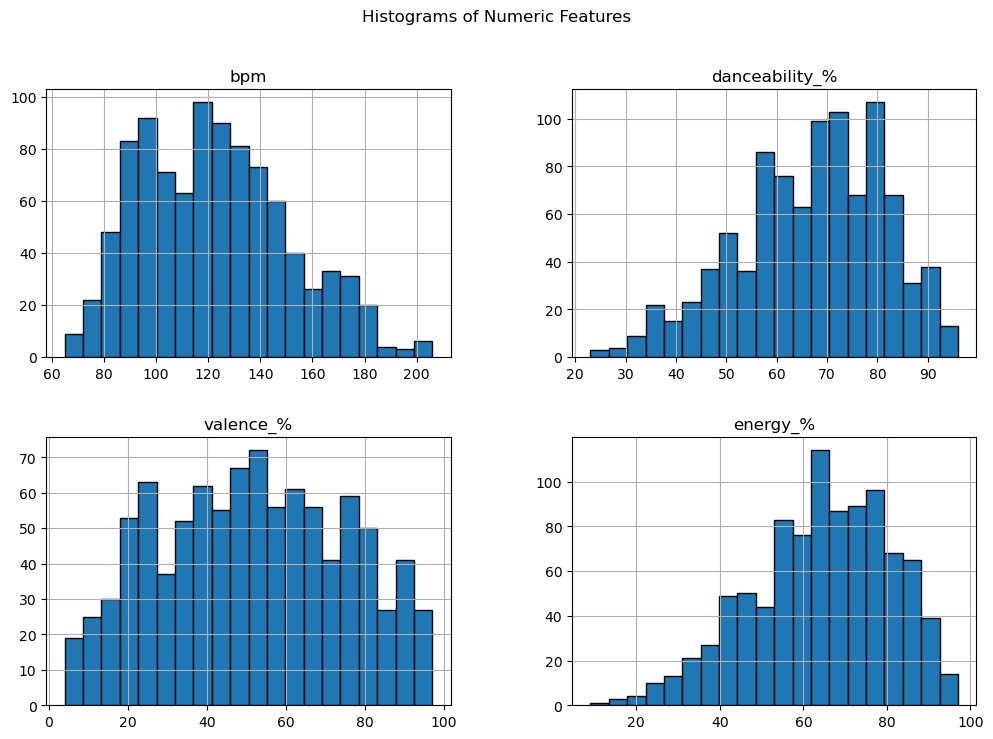

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with correct encoding
df = pd.read_csv("Spotify -Raw Data.csv", encoding='ISO-8859-1')

# Display basic information
print(df.info())
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Histograms for key numerical columns
numeric_columns = ["streams", "bpm", "danceability_%", "valence_%", "energy_%"]
df[numeric_columns].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Features")
plt.show()
